# Lab 7
Majo Gil 20337

Joshua Chicoj 20566

In [18]:
# imports
import pandas as pd
import tensorflow as tf
import numpy as np
import chardet
import re
from collections import Counter
import networkx as nx

import community as community_louvain
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import networkx as nx
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Majix\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Majix\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Majix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import json


file_path = 'tioberny.txt'  
data_list = []


with open(file_path, 'rb') as file:
    raw_data = file.read(10000)  
    result = chardet.detect(raw_data)
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")



with open(file_path, 'r', encoding=encoding, errors='replace') as file:
    for line in file:

        line = line.strip()
        if not line:
            continue
        try:

            data = json.loads(line)
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON on line: {line[:50]}...")  
            print(f"Error: {e}")


df = pd.json_normalize(data_list)

Detected encoding: UTF-16


In [3]:
df

,id,id_str,url,date,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,...,quotedTweet.quotedTweet.inReplyToTweetIdStr,quotedTweet.quotedTweet.inReplyToUser,quotedTweet.quotedTweet.source,quotedTweet.quotedTweet.sourceUrl,quotedTweet.quotedTweet.sourceLabel,quotedTweet.quotedTweet.media.photos,quotedTweet.quotedTweet.media.videos,quotedTweet.quotedTweet.media.animated,quotedTweet.quotedTweet.card,quotedTweet.quotedTweet._type
0,1834281080029110288,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-09-12 17:21:03+00:00,es,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1834252464092069901,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-09-12 15:27:20+00:00,es,#URGENTE Lo que los medios #faferos no informa...,12,80,142,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1834280919336976681,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-09-12 17:20:25+00:00,es,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1834280512933732694,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-09-12 17:18:48+00:00,es,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1834279986254987428,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-09-12 17:16:42+00:00,es,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,1832570119563743682,1832570119563743682,https://x.com/Benjamdc7/status/183257011956374...,2024-09-08 00:02:18+00:00,es,@marvgcaceres @diaco_gt @GuatemalaGob @vinicio...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5015,1832569640079270018,1832569640079270018,https://x.com/lfarivas/status/1832569640079270018,2024-09-08 00:00:24+00:00,es,@Soygeorgegt Lastima @BArevalodeLeon la gente ...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5016,1832569563109896313,1832569563109896313,https://x.com/MynorAroldopab1/status/183256956...,2024-09-08 00:00:05+00:00,es,Alguien sabe si este precio es culpa de @BArev...,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5017,1832568528508968963,1832568528508968963,https://x.com/extasisvgames/status/18325685285...,2024-09-07 23:55:59+00:00,es,@guate_opina @BArevalodeLeon Y los diputados p...,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

list(df.columns)

['id',
 'id_str',
 'url',
 'date',
 'lang',
 'rawContent',
 'replyCount',
 'retweetCount',
 'likeCount',
 'quoteCount',
 'bookmarkedCount',
 'conversationId',
 'conversationIdStr',
 'hashtags',
 'cashtags',
 'mentionedUsers',
 'links',
 'viewCount',
 'retweetedTweet',
 'place',
 'coordinates',
 'inReplyToTweetId',
 'inReplyToTweetIdStr',
 'inReplyToUser',
 'source',
 'sourceUrl',
 'sourceLabel',
 'card',
 '_type',
 'user.id',
 'user.id_str',
 'user.url',
 'user.username',
 'user.displayname',
 'user.rawDescription',
 'user.created',
 'user.followersCount',
 'user.friendsCount',
 'user.statusesCount',
 'user.favouritesCount',
 'user.listedCount',
 'user.mediaCount',
 'user.location',
 'user.profileImageUrl',
 'user.profileBannerUrl',
 'user.protected',
 'user.verified',
 'user.blue',
 'user.blueType',
 'user.descriptionLinks',
 'user.pinnedIds',
 'user._type',
 'quotedTweet.id',
 'quotedTweet.id_str',
 'quotedTweet.url',
 'quotedTweet.date',
 'quotedTweet.user.id',
 'quotedTweet.user.id

## Limpieza de datos

In [5]:
relevant_columns = [
    'id', 'date', 'rawContent', 'replyCount', 'retweetCount',
    'likeCount', 'quoteCount', 'mentionedUsers', 'hashtags',
    'user.username', 'user.followersCount', 'user.verified', 'user.location', 
    'quotedTweet.user.username', 'quotedTweet.hashtags', 'inReplyToUser.username'
]
df = df[relevant_columns]


df = df.dropna(subset=['rawContent'])


df['mentionedUsers'] = df['mentionedUsers'].apply(lambda x: [user['username'] for user in x] if isinstance(x, list) else [])

stop_words = set(stopwords.words('spanish'))

def clean_text(text):

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    text = text.lower()
    
    text_tokens = text.split()
    filtered_text = ' '.join([word for word in text_tokens if word not in stop_words])
    return filtered_text


df['cleanedContent'] = df['rawContent'].apply(clean_text)


df = df.drop_duplicates(subset=['id'])

df.head()

,id,date,rawContent,replyCount,retweetCount,likeCount,quoteCount,mentionedUsers,hashtags,user.username,user.followersCount,user.verified,user.location,quotedTweet.user.username,quotedTweet.hashtags,inReplyToUser.username,cleanedContent
0,1834281080029110288,2024-09-12 17:21:03+00:00,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,0,"[usembassyguate, 48CantonesToto, USAIDGuate, U...",[],La_ReVoluZzion,2102,False,Cuba 🇨🇺,XelaNewsGt,"[URGENTE, faferos, BernardoArévalo, NebajQuich...",NaN,confirmado compaeres impuesto usembassyguate s...
1,1834252464092069901,2024-09-12 15:27:20+00:00,#URGENTE Lo que los medios #faferos no informa...,12,80,142,15,[],"[URGENTE, faferos, BernardoArévalo, NebajQuich...",XelaNewsGt,3462,False,Guatemala,NaN,NaN,NaN,urgente medios faferos informaron ayer acerca ...
2,1834280919336976681,2024-09-12 17:20:25+00:00,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,0,"[IvanDuque, BArevalodeLeon]",[],M24095273,30,False,,NaN,NaN,IvanDuque,ivanduque barevalodeleon usaste pegasus espiar...
3,1834280512933732694,2024-09-12 17:18:48+00:00,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,0,"[IvanDuque, BArevalodeLeon]",[],carlosalbesc,11,False,,NaN,NaN,IvanDuque,ivanduque barevalodeleon entienden bien s estn...
4,1834279986254987428,2024-09-12 17:16:42+00:00,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,0,"[BArevalodeLeon, KarinHerreraVP, AGN_noticias,...",[],Brenda_AGN,564,False,Guatemala,NaN,NaN,NaN,presidente barevalodeleon vicepresidenta karin...


In [6]:
df['connections'] = df.apply(lambda row: list(
    set(
        row['mentionedUsers'] + 
        ([row['quotedTweet.user.username']] if pd.notna(row['quotedTweet.user.username']) else []) + 
        ([row['inReplyToUser.username']] if pd.notna(row['inReplyToUser.username']) else [])
    )
), axis=1)
df.head()

,id,date,rawContent,replyCount,retweetCount,likeCount,quoteCount,mentionedUsers,hashtags,user.username,user.followersCount,user.verified,user.location,quotedTweet.user.username,quotedTweet.hashtags,inReplyToUser.username,cleanedContent,connections
0,1834281080029110288,2024-09-12 17:21:03+00:00,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,0,"[usembassyguate, 48CantonesToto, USAIDGuate, U...",[],La_ReVoluZzion,2102,False,Cuba 🇨🇺,XelaNewsGt,"[URGENTE, faferos, BernardoArévalo, NebajQuich...",NaN,confirmado compaeres impuesto usembassyguate s...,"[XelaNewsGt, USAIDGuate, usembassyguate, UEGua..."
1,1834252464092069901,2024-09-12 15:27:20+00:00,#URGENTE Lo que los medios #faferos no informa...,12,80,142,15,[],"[URGENTE, faferos, BernardoArévalo, NebajQuich...",XelaNewsGt,3462,False,Guatemala,NaN,NaN,NaN,urgente medios faferos informaron ayer acerca ...,[]
2,1834280919336976681,2024-09-12 17:20:25+00:00,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,0,"[IvanDuque, BArevalodeLeon]",[],M24095273,30,False,,NaN,NaN,IvanDuque,ivanduque barevalodeleon usaste pegasus espiar...,"[BArevalodeLeon, IvanDuque]"
3,1834280512933732694,2024-09-12 17:18:48+00:00,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,0,"[IvanDuque, BArevalodeLeon]",[],carlosalbesc,11,False,,NaN,NaN,IvanDuque,ivanduque barevalodeleon entienden bien s estn...,"[BArevalodeLeon, IvanDuque]"
4,1834279986254987428,2024-09-12 17:16:42+00:00,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,0,"[BArevalodeLeon, KarinHerreraVP, AGN_noticias,...",[],Brenda_AGN,564,False,Guatemala,NaN,NaN,NaN,presidente barevalodeleon vicepresidenta karin...,"[BArevalodeLeon, CongresoGuate, KarinHerreraVP..."


## Análisis Exploratorio

In [7]:

total_tweets = len(df)

unique_users = df['user.username'].nunique()
total_mentions = df['mentionedUsers'].apply(len).sum()
total_hashtags = df['hashtags'].apply(len).sum()
engagement_stats = df[['replyCount', 'retweetCount', 'likeCount', 'quoteCount']].sum()

print(f"Total de Tweets: {total_tweets}")
print(f"Usuarios Únicos: {unique_users}")
print(f"Menciones Totales: {total_mentions}")
print(f"Hashtags Totales: {total_hashtags}")
print(f"Interacciones Totales:\n{engagement_stats}")


Total de Tweets: 4944
Usuarios Únicos: 2620
Menciones Totales: 17242
Hashtags Totales: 383
Interacciones Totales:
replyCount       30251
retweetCount     85030
likeCount       432662
quoteCount        7107
dtype: int64


In [8]:

hashtag_list = df['hashtags'].explode().dropna().tolist()
hashtag_counts = Counter(hashtag_list).most_common(10)

mention_list = df['mentionedUsers'].explode().dropna().tolist()
mention_counts = Counter(mention_list).most_common(10)

print("Hashtags más frecuentes:", hashtag_counts)
print("Menciones más frecuentes:", mention_counts)


Hashtags más frecuentes: [('GuatemalaSaleAdelante', 24), ('MinfinSaleAdelante', 17), ('URGENTE', 16), ('Presupuesto2025', 14), ('UnPresupuestoParaLaPoblación', 13), ('Guatemala', 13), ('EnElPaísDCA', 12), ('NacionalesAGN', 8), ('AHORA', 5), ('TraficoGT', 5)]
Menciones más frecuentes: [('BArevalodeLeon', 4806), ('GuatemalaGob', 909), ('UbaldoMacu', 574), ('santipalomov', 524), ('MPguatemala', 466), ('FJimenezmingob', 403), ('mingobguate', 289), ('__VaderTG', 272), ('CongresoGuate', 254), ('DiariodeCA', 219)]


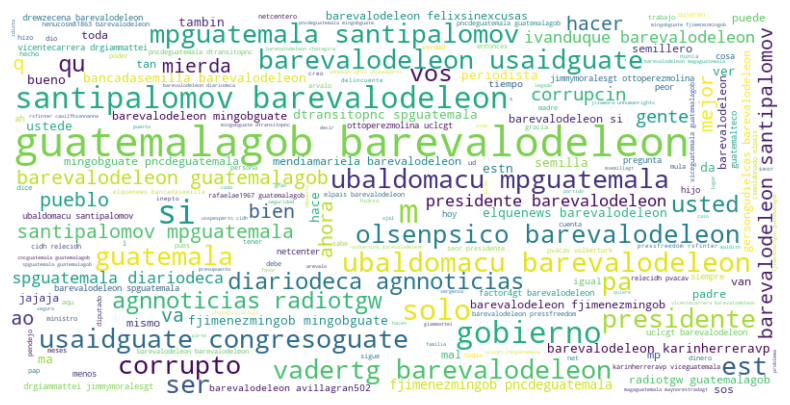

In [9]:


all_text = ' '.join(df['cleanedContent'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [10]:

user_interactions = df.groupby('user.username')[['replyCount', 'retweetCount', 'likeCount', 'quoteCount']].sum()

# Mostrar los usuarios más activos (con más interacciones)
most_active_users = user_interactions.sort_values(by='retweetCount', ascending=False).head(10)
print(most_active_users)


                 replyCount  retweetCount  likeCount  quoteCount
user.username                                                   
JMilei                 8336         14643      88512        1872
pablocasx1              863          6592      34864         326
AMAZlNGNATURE           901          5221      59391         597
petrogustavo           4160          5203      12639         550
nayibbukele             952          4685      35043         237
Arteymas_               378          4570      67416         243
DanteForesi            1124          3223       6810         147
monerorictus             76          3016       9284          45
capTercio                72          2846       7996          78
MayraDo57466678         196          2818       7135         125


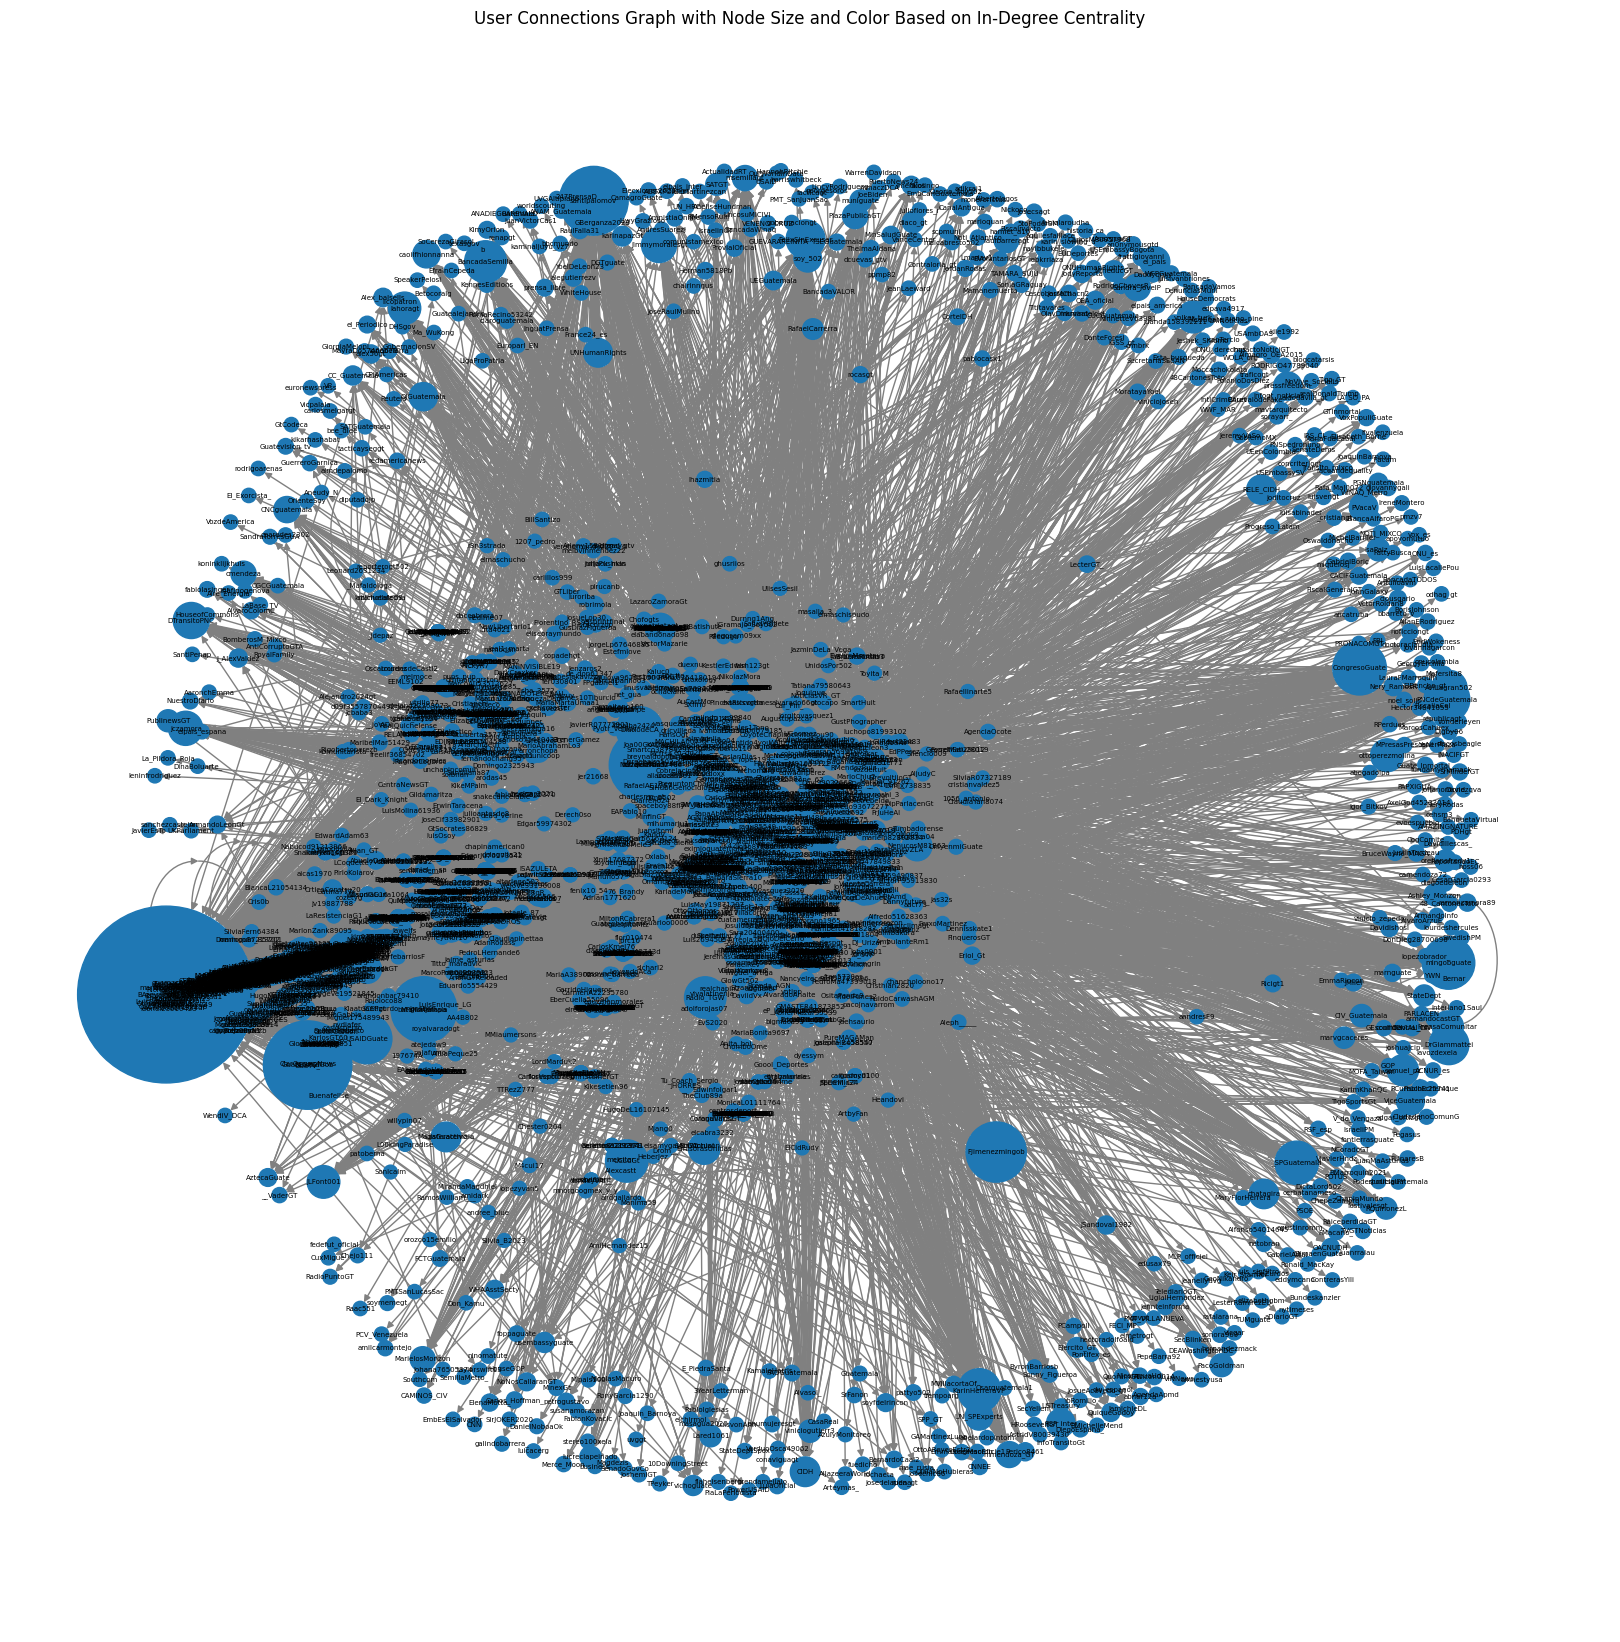

In [11]:
# Create directed graph
G = nx.DiGraph()

# Add edges to the graph based on connections
for index, row in df.iterrows():
    user = row['user.username']
    for connection in row['connections']:
        G.add_edge(user, connection)

# Calculate in-degree centrality (number of incoming edges for each node)
in_degree_centrality = nx.in_degree_centrality(G)

# Customize node size and color based on in-degree centrality
node_size = [20000 * in_degree_centrality[node] + 100 for node in G.nodes()]
node_color = [in_degree_centrality[node] for node in G.nodes()]

# Create the plot
plt.figure(figsize=(16, 16))
pos = nx.spring_layout(G)  # Layout for visualization

# Draw nodes with customized size and color
nodes = nx.draw(G, pos, with_labels=True, node_size=node_size, edge_color='gray', font_size=5, font_weight='regular')

plt.title("User Connections Graph with Node Size and Color Based on In-Degree Centrality")
plt.show()

In [12]:
for node, centrality in sorted(in_degree_centrality.items(), key=lambda item: item[1], reverse=True)[0:9]:
    print(f"{node}: {centrality:.2f}")

BArevalodeLeon: 0.81
GuatemalaGob: 0.20
UbaldoMacu: 0.13
santipalomov: 0.12
MPguatemala: 0.11
FJimenezmingob: 0.09
CongresoGuate: 0.07
__VaderTG: 0.07
mingobguate: 0.07


In [13]:
from networkx.algorithms.community import girvan_newman

communities = girvan_newman(G)
top_level_communities = next(communities)
print("Communities detected:")
for community in top_level_communities:
    print(community)

Communities detected:
{'CesarCobaquil', 'fer108742428660', 'L0B0_GT', '_____DAS____', 'EsReyes76', 'Mununo57', 'lacolo081972', 'IRS_CI', 'puertoinforma', 'juankrpg', 'DiariodeCA', 'Pablo_Arriola_', 'AIRHELP', 'RuGar_V', 'GarciaDanilo63', 'Alejand04426768', 'Aleph_____', 'GuerreroGarnica', 'FMendezArgueta', 'GBerganza2023', 'churpioloco', 'udarthjokerr', 'AlfredoBar80164', 'WEDoMonter', 'UN_SPExperts', 'Artesan28700114', 'AsodeguaONG', 'eximioguatemala', 'OnlyenmiGuate', 'AlvaroColomC', 'Jul_Sando_1962', 'RodriguezaDani', 'mildred_gaitan', 'adolforojas07', 'JoeL34440015', 'Humbert41818287', 'elakademicista', 'asolaresdl', 'oscarDNB_', 'amcentec', 'dimb502', 'CanalAntigua', 'nosoynetcenter', 'DagobertoJoseK1', 'MVillacortaOf', 'trajeado555', 'bigmaca93', 'NCoradoGT', 'SiVmenor', 'Luka4life', 'marchila74', 'fjadlc', 'karma_edwin', 'extasisvgames', 'RoxanaRuizi', 'rolanrama', 'KeKevinfc10', 'Ar76974876Diego', 'BruceWayne_MAGA', 'LuchoRiveraV', 'alvaronavaspere', 'abner_schol', 'CorteIDH', 

## Métricas de la red

In [14]:
# Calculate density
density = nx.density(G)
print(f"Density: {density:.4f}")

# Calculate diameter (only possible if the graph is strongly connected)
if nx.is_strongly_connected(G):
    diameter = nx.diameter(G)
    print(f"Diameter: {diameter}")
else:
    print("Graph is not strongly connected, cannot compute diameter for the whole graph.")

# Calculate the clustering coefficient (grouping coefficient)
clustering_coefficient = nx.average_clustering(G.to_undirected())
print(f"Average Clustering Coefficient: {clustering_coefficient:.4f}")

Density: 0.0013
Graph is not strongly connected, cannot compute diameter for the whole graph.
Average Clustering Coefficient: 0.3734


# Identificación y Análisis de comunidades

Communities detected: [['0205mh_', '0515Om', '1056_antonio', '10DowningStreet', '10elcrack10', '1207_pedro', '197674A', '1981eljuanpi', '1994Meola', '1c2ff7de4cf7407', '23bbdo', '247PrensaD', '29alexander29', '2Bereniceee', '360Tono', '3YearLetterman', '3triatlon', '48CantonesToto', '48_CantonesToto', '502gCyrius', '53675367', '57085652', '5Josuejimenez', '5toPoderSM', '68e33772d49743d', '73Lavon', '75Tonyruiz', '76_Brandy', '7ab3e6a4505c45d', '82Pagan', '83fdfc7bd4554fa', '87kikin', '88Libre', '9102ramoto', '91072dff5a5a4f1', '999accendini', 'A78021Relojeria', 'AA4B802', 'ACHISHPATOJO', 'ACNUR_es', 'AGEXPORTGT', 'AGN_noticias', 'AIDA22101', 'AIRHELP', 'AJutzuy', 'AL68985274', 'AMAZlNGNATURE', 'ANADIEGuatemala', 'ANAM_Guatemala', 'ANGELDAEMONN', 'AVillagran502', 'Aacooljaa', 'AaronchEmma', 'Abner864673', 'AbnerCano77', 'AbnerMazar35539', 'AbueloDeSiete', 'Acidoanton1107', 'Acolindres123', 'ActualidadRT', 'AdanRodass', 'Adimparody', 'AdnJernimo1', 'AdolfoAlbertoC2', 'AdolfoF92932835', '

C:\Users\Majix\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


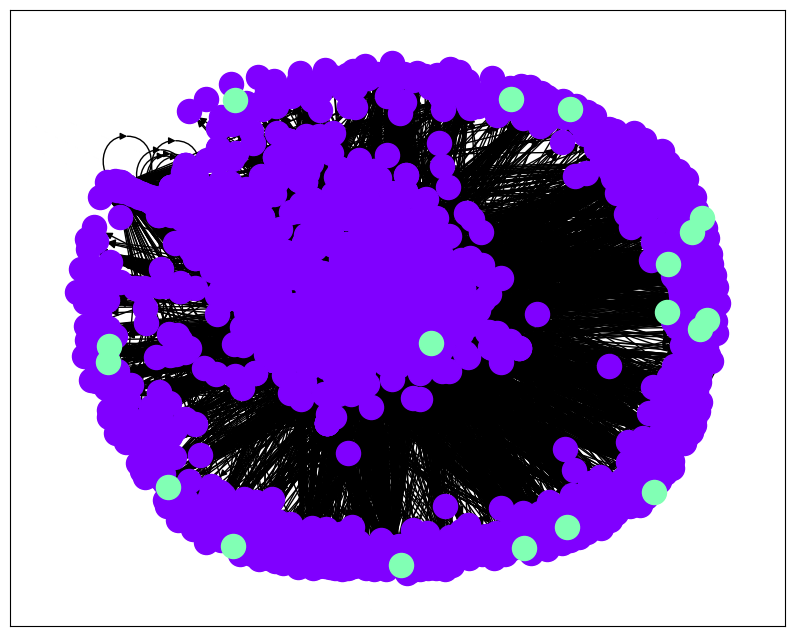

In [25]:
import networkx as nx
from networkx.algorithms.community import girvan_newman

# Apply Girvan-Newman community detection
communities = girvan_newman(G)

# Get the top partition (first level of split)
top_level_communities = next(communities)
top_level_communities = sorted(map(sorted, top_level_communities))

print("Communities detected:", top_level_communities)

# Visualizing the communities
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))

# Assigning different colors to each community
for i, community in enumerate(top_level_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=plt.cm.rainbow(i / len(top_level_communities)))

nx.draw_networkx_edges(G, pos)
plt.show()



In [26]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Sort users by their centrality to find influencers
influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top influencers by degree centrality:", influencers[:10])


Top influencers by degree centrality: [('BArevalodeLeon', 0.8052984360038302), ('GuatemalaGob', 0.1982125758059368), ('UbaldoMacu', 0.13597191190552185), ('santipalomov', 0.11809766996488988), ('MPguatemala', 0.1078838174273859), ('FJimenezmingob', 0.08969039259495691), ('__VaderTG', 0.07628471113948293), ('CongresoGuate', 0.06958187041174593), ('mingobguate', 0.06639004149377593), ('USAIDGuate', 0.06000638365783594)]


In [27]:
isolated_groups = list(nx.weakly_connected_components(G))
print("Number of isolated groups:", len(isolated_groups))


Number of isolated groups: 1


In [29]:
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Apply to your tweet dataset
df['sentiment'] = df['cleanedContent'].apply(analyze_sentiment)


In [32]:

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleanedContent'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the topics
for index, topic in enumerate(lda.components_):
    print(f"TOP 10 words for topic #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])



TOP 10 words for topic #0
['cidh', 'volkerturk', 'guatemala', 'est', 'si', 'padre', 'usted', 'karinherreravp', 'guatemalagob', 'presidente']
TOP 10 words for topic #1
['jimmymoralesgt', 'ms', 'uclcgt', 'vicentecarrera', 'drgiammattei', 'si', 'mpguatemala', 'guatemalagob', 'santipalomov', 'ubaldomacu']
TOP 10 words for topic #2
['solo', 'ms', 'sos', 'vos', 'usaidguate', 'santipalomov', 'mpguatemala', 'congresoguate', 'ubaldomacu', 'vadertg']
TOP 10 words for topic #3
['nenucosm81863', 'mingobguate', 'gersongudielcas', 'avillagran502', 'si', 'bancadasemilla', 'ms', 'ivanduque', 'elquenews', 'olsenpsico']
TOP 10 words for topic #4
['gobierno', 'dtransitopnc', 'radiotgw', 'agnnoticias', 'spguatemala', 'pncdeguatemala', 'mingobguate', 'diariodeca', 'fjimenezmingob', 'guatemalagob']


# INFORME
## Limpieza y preprocesamiento
En este caso, recibimos un data set que estaba para comenzar, en formato json, y con mucha información poco útil o repetitiva. Consiguientemente, lo primero que se hizo fue pasar los datos a una estructura de pandas data frame. A partir de esto, obtuvimos las columnas que teníamos, y en base en las preguntas que debíamos contestar, decidimos las columnas que debíamos mantener, las cuales fueron 'id', 'date', 'rawContent', 'replyCount', 'retweetCount',
    'likeCount', 'quoteCount', 'mentionedUsers', 'hashtags',
    'user.username', 'user.followersCount', 'user.verified', 'user.location', 
    'quotedTweet.user.username', 'quotedTweet.hashtags', 'inReplyToUser.username'.
    
Luego de estos comenzamos con la imputación de datos. Eliminamos todos los twits que estaban vacíos, reestructuramos la columna que contenía las menciones de los twits, y procedimos a eliminar cosas como las url, signos de puntuación, stop words y tildes y otros acentos. Finalmente, eliminamos los duplicados y lo convertimos todo a minúscula.

## Análisis Exploratorio
- Total de Tweets: 4944
- Usuarios Únicos: 2620
- Menciones Totales: 17242
- Hashtags Totales: 383
- Interacciones Totales:
- replyCount       30251
- retweetCount     85030
- likeCount       432662
- quoteCount        7107

Hashtags más frecuentes: [('GuatemalaSaleAdelante', 24), ('MinfinSaleAdelante', 17), ('URGENTE', 16), ('Presupuesto2025', 14), ('UnPresupuestoParaLaPoblación', 13), ('Guatemala', 13), ('EnElPaísDCA', 12), ('NacionalesAGN', 8), ('AHORA', 5), ('TraficoGT', 5)]
Menciones más frecuentes: [('BArevalodeLeon', 4806), ('GuatemalaGob', 909), ('UbaldoMacu', 574), ('santipalomov', 524), ('MPguatemala', 466), ('FJimenezmingob', 403), ('mingobguate', 289), ('__VaderTG', 272), ('CongresoGuate', 254), ('DiariodeCA', 219)]

### Preguntas 
- ¿Aparte de arévalo, qué es lo siguiente que tenía mayor permanencia en los twits?
    - El gobierno de guatemala en general
- Podíamos ver evidencia clara de mayor cosas negativas o positivas
    - Sí, particularmente por los Hashtags podemos ver que en general los twits tienen un tono positivo
- ¿Existen menciones que parece que no tienen relación?
    - Sí, veamos que varios de los twits mencionan a periodistas u otros funcionarios del gobierno que parecieran no estar directamente relacionados con Arévalo

## Análisis de contenido y sentimiento
Vemos que las comunidades detectadas no son claras, y esto se puede ver de manera más clara en los gráficos presentados. Sin embargo, sí podemos agrupar los grupos en general de diferentes maneras. Podemos ver que existe un subset de tweets que hablan tanto del gobierno actual como los anteriores. Por otro lado, tenemos un grupo que se centra en hablar sobre el gobierno actual, de las deficiencias y qué es lo que se está haciendo. Finalmente, parece ser que el resto de tweets son más que todo para preguntar a medios y a influencers sobre noticias respecto al gobierno. Ahora ¿Por qué no se pueden formar comunidades? veamos que los tweets, aunque sí los podemos agrupar en temáticas claras, no vienen siempre de los mismos usuarios, es decir, la mayoría de los usuarios emite tweets dentro de todas lass categorías, por lo que no se puede hacer una distinción clara, particularmente porque estamos trabajando con un grafo dirigido.

## Interpretación y contexto
Obviamente, el influencer principal es Bernardo Arévalo, y tiene una influencia significativa sobre todo lo demás, como se puede observar en el primer grafo elaborado. Sin embargo, es claro que otros influencers, particularmente centros de noticias y otros políticos, tienen una influencia significativa en el scope de como se desarrollan las cosas. En este caso, podemos suponer que las opiniones son basadas fuertemente en esto, particularmente por la cantidad de menciones que se les hace a estos personajes

